In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle as cp
import sys
sys.path.append("../../utils/")
from plot_utils import get_colors

In [28]:
def get_value_from_dict(folder_name, key=None):
    with open(folder_name + "/results.pkl") as f:
        res_dict = cp.load(f)
    return res_dict[key]

In [29]:
colors_dict = get_colors()

In [30]:
general_folder_old = "/Users/Jian/Data/research/lp_kernel/lp_kernel/kernel_reg/multi_seed_results/census_results_64_bit_pca_rff/"

# 8192 fp feat

In [31]:
general_folder = "/Users/Jian/Data/research/lp_kernel/lp_kernel/kernel_reg/multi_seed_results/census_results_64_bit_fixed_design/"

In [32]:
def get_l2_error(subkey_list, result_folder):
    l2_error_train_list = []
    l2_error_test_list = []
    lambda_list = []
    subdirs = [x[0] for x in os.walk(result_folder)] 
    for subdir in subdirs:
        is_target = True
        for subkey in subkey_list:
            if subkey not in subdir:
                is_target = False
                break
        if is_target:
#             if "_noise_sigma_" in subdir:
#                 if ("/results.pkl" not in subdir) or (not os.path.isdir(subdir) ):
#                     continue
#             print subdir
#             raw_input()
            l2_error_train_list.append(np.sqrt(get_value_from_dict(subdir, "train_l2_error") ) )
            l2_error_test_list.append(np.sqrt(get_value_from_dict(subdir, "test_l2_error") ) )
            lambda_list.append(float(subdir.split("lambda_")[1].split("_")[0]) )
    return l2_error_train_list, l2_error_test_list, lambda_list

# 8192

('noise level', '1e-2')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


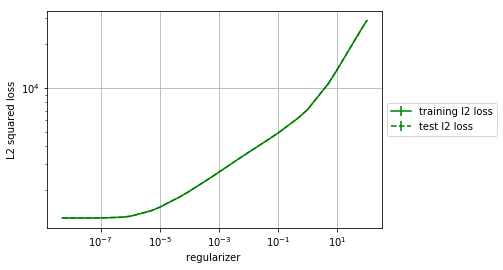

('noise level', '1e-1')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


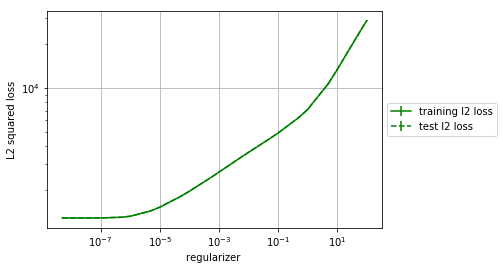

('noise level', '1e0')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


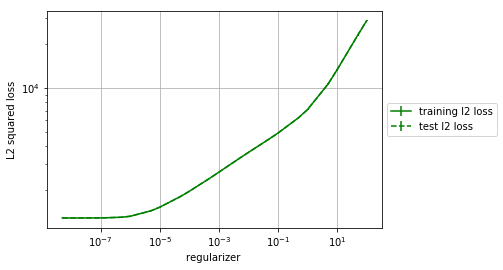

('noise level', '1e1')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


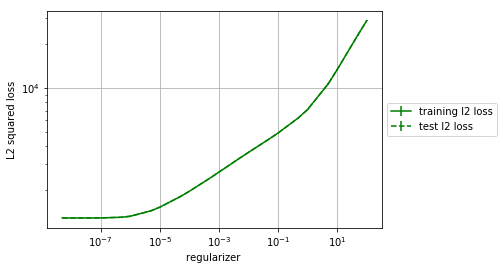

('noise level', '1e2')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


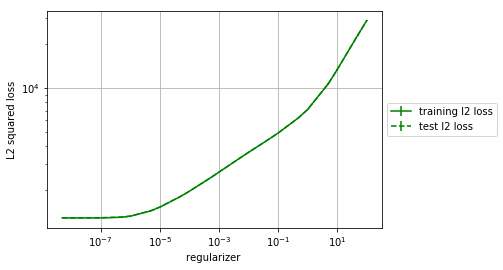

('noise level', '1e3')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


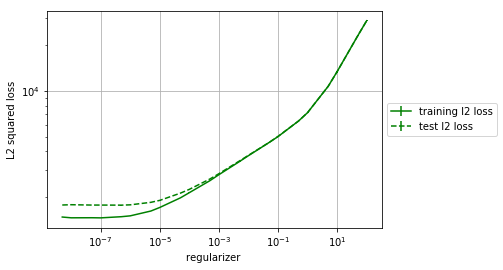

('noise level', '1e4')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


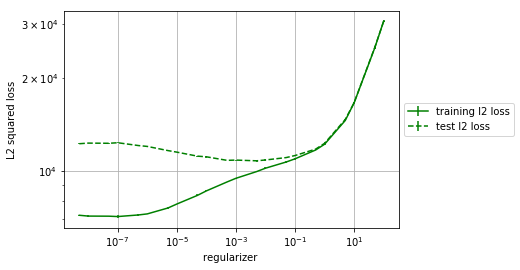

('noise level', '1e5')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


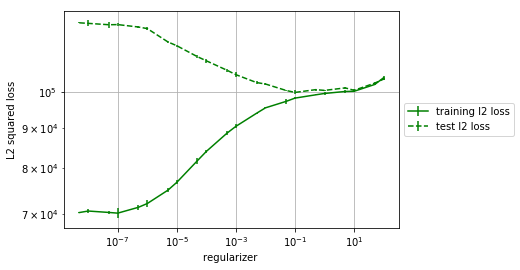

In [34]:
# plot for fixed number of features
def plot_single_precision(subkey_list_input):
    fp_bits = 32
    plt.figure()
    # n_feat_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
    lamb_list = ["5e-9", "1e-8", "5e-8", "1e-7", "5e-7", "1e-6", "5e-6", "1e-5",
                 "5e-5", "1e-4", "5e-4", "1e-3", "5e-3", "1e-2", "5e-2", "1e-1",
                 "5e-1", "1e0", "5e0", "1e1", "5e1", "1e2"]
#     lamb_list = ["1e-6", "1e-5", "1e-4", "1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2"]
    lamb_list_num = [float(x) for x in lamb_list]
    print lamb_list_num
    l2_train_mean = []
    l2_train_std = []
    l2_test_mean = []
    l2_test_std = []
    for lamb in lamb_list:
        subkey_list = subkey_list_input + ["lambda_" + lamb + "_"]
        l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, general_folder)
        l2_train_mean.append(np.mean(l2_train) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_train_std.append(np.std(l2_train) ) # = [np.min(l2_test), ] * len(n_feat_list)
        l2_test_mean.append(np.mean(l2_test) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_test_std.append(np.std(l2_test) ) # = [np.min(l2_test), ] * len(n_feat_list)
    plt.errorbar(lamb_list_num, l2_train_mean, yerr=l2_train_std, fmt="g", label="training l2 loss")
    plt.errorbar(lamb_list_num, l2_test_mean, yerr=l2_test_std, fmt="g--", label="test l2 loss")
#     plt.errorbar(lamb_list_num, l2_train_mean, yerr=[x * 100 for x in l2_train_std], fmt="g", label="training l2 loss")
#     plt.errorbar(lamb_list_num, l2_test_mean, yerr=[x * 100 for x in l2_test_std] , fmt="g--", label="test l2 loss")
    ax = plt.subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel("regularizer ")
    plt.ylabel("L2 squared loss")
#     plt.ylim([None, 1e6])
    plt.show()

for noise_level in ["1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4", "1e5"]:
    print("noise level", noise_level)
    plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_8192", "_noise_sigma_" + noise_level])

('noise level', '1e-2')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


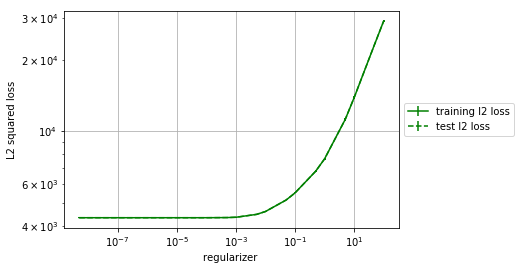

('noise level', '1e-1')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


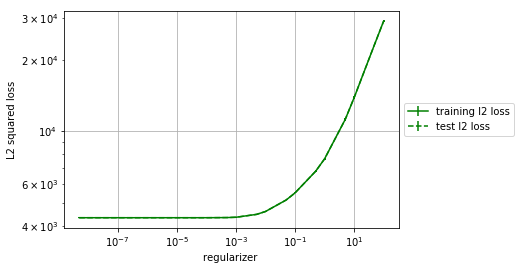

('noise level', '1e0')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


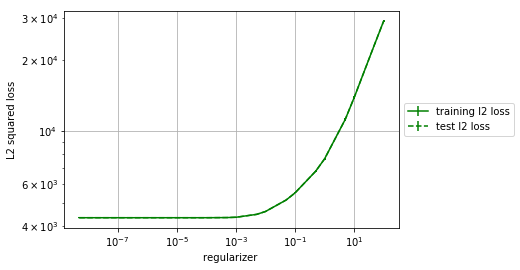

('noise level', '1e1')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


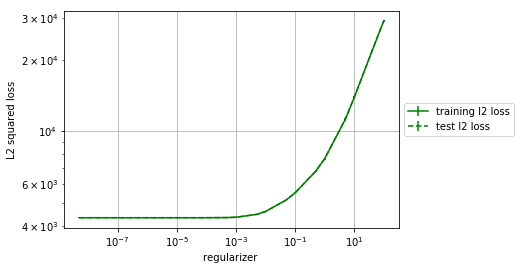

('noise level', '1e2')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


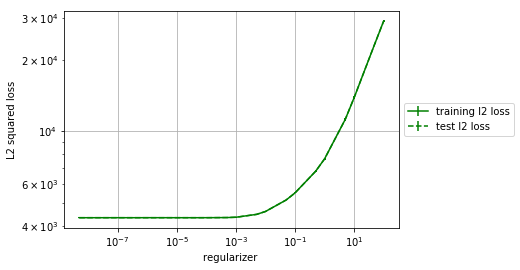

('noise level', '1e3')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


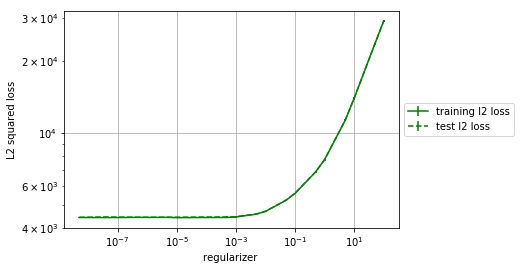

('noise level', '1e4')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


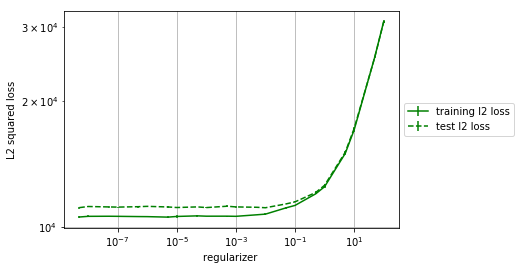

('noise level', '1e5')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


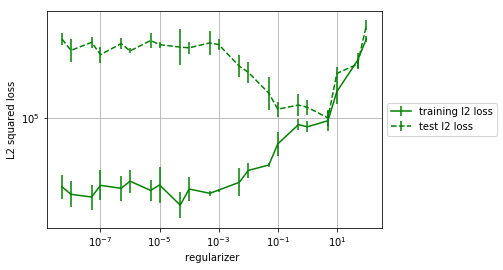

In [36]:
# plot for fixed number of features
def plot_single_precision(subkey_list_input):
    fp_bits = 32
    plt.figure()
    # n_feat_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
    lamb_list = ["5e-9", "1e-8", "5e-8", "1e-7", "5e-7", "1e-6", "5e-6", "1e-5",
                 "5e-5", "1e-4", "5e-4", "1e-3", "5e-3", "1e-2", "5e-2", "1e-1",
                 "5e-1", "1e0", "5e0", "1e1", "5e1", "1e2"]
#     lamb_list = ["1e-6", "1e-5", "1e-4", "1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2"]
    lamb_list_num = [float(x) for x in lamb_list]
    print lamb_list_num
    l2_train_mean = []
    l2_train_std = []
    l2_test_mean = []
    l2_test_std = []
    for lamb in lamb_list:
        subkey_list = subkey_list_input + ["lambda_" + lamb + "_"]
        l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, general_folder)
        l2_train_mean.append(np.mean(l2_train) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_train_std.append(np.std(l2_train) ) # = [np.min(l2_test), ] * len(n_feat_list)
        l2_test_mean.append(np.mean(l2_test) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_test_std.append(np.std(l2_test) ) # = [np.min(l2_test), ] * len(n_feat_list)
    plt.errorbar(lamb_list_num, l2_train_mean, yerr=l2_train_std, fmt="g", label="training l2 loss")
    plt.errorbar(lamb_list_num, l2_test_mean, yerr=l2_test_std, fmt="g--", label="test l2 loss")
#     plt.errorbar(lamb_list_num, l2_train_mean, yerr=[x * 100 for x in l2_train_std], fmt="g", label="training l2 loss")
#     plt.errorbar(lamb_list_num, l2_test_mean, yerr=[x * 100 for x in l2_test_std] , fmt="g--", label="test l2 loss")
    ax = plt.subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel("regularizer ")
    plt.ylabel("L2 squared loss")
#     plt.ylim([None, 1e6])
    plt.show()

for noise_level in ["1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4", "1e5"]:
    print("noise level", noise_level)
    plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_1024", "_noise_sigma_" + noise_level])

Exact kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


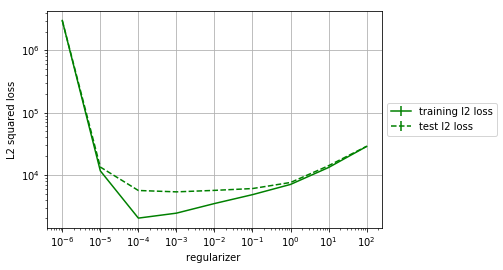

Full precision rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


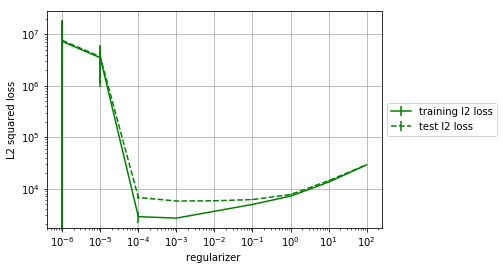

32 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


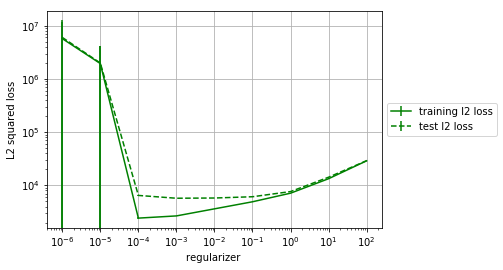

16 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


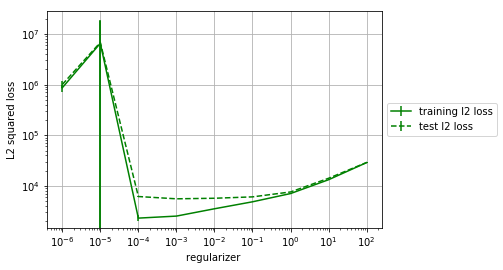

8 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


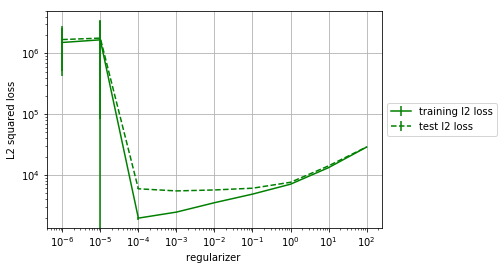

4 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


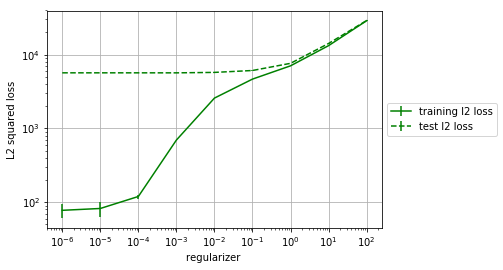

2 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
1e-05


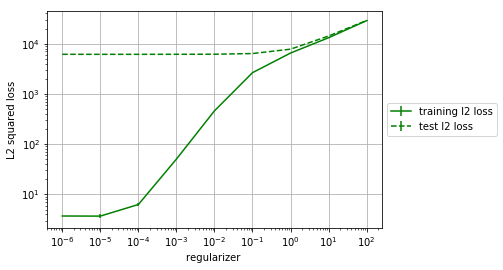

1 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.1


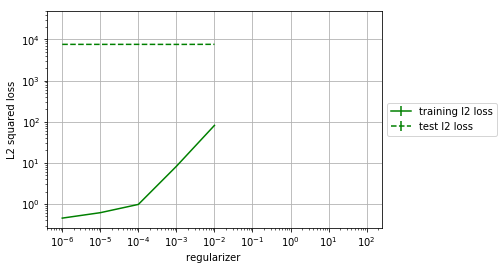

In [16]:
# plot for fixed number of features
def plot_single_precision(subkey_list_input):
    fp_bits = 32
    plt.figure()
    # n_feat_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
    lamb_list = ["1e-6", "1e-5", "1e-4", "1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2"]
    lamb_list_num = [float(x) for x in lamb_list]
    print lamb_list_num
    l2_train_mean = []
    l2_train_std = []
    l2_test_mean = []
    l2_test_std = []
    for lamb in lamb_list:
        subkey_list = subkey_list_input + ["lambda_" + lamb + "_"]
        l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, general_folder)
        l2_train_mean.append(np.mean(l2_train) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_train_std.append(np.std(l2_train) ) # = [np.min(l2_test), ] * len(n_feat_list)
        l2_test_mean.append(np.mean(l2_test) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_test_std.append(np.std(l2_test) ) # = [np.min(l2_test), ] * len(n_feat_list)
    print lamb_list_num[np.argmin(l2_test_mean) ]
    plt.errorbar(lamb_list_num, l2_train_mean, yerr=l2_train_std, fmt="g", label="training l2 loss")
    plt.errorbar(lamb_list_num, l2_test_mean, yerr=l2_test_std, fmt="g--", label="test l2 loss")
#     plt.errorbar(lamb_list_num, l2_train_mean, yerr=[x * 100 for x in l2_train_std], fmt="g", label="training l2 loss")
#     plt.errorbar(lamb_list_num, l2_test_mean, yerr=[x * 100 for x in l2_test_std] , fmt="g--", label="test l2 loss")
    ax = plt.subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel("regularizer ")
    plt.ylabel("L2 squared loss")
#     plt.ylim([None, 1e6])
    plt.show()
print("Exact kernel")
plot_single_precision(subkey_list_input=["exact", ])
print("Full precision rff kernel")
plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_8192"])
print("32 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_32_", "n_fp_feat_8192"])
print("16 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_16_", "n_fp_feat_8192"])
print("8 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_8_", "n_fp_feat_8192"])
print("4 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_4_", "n_fp_feat_8192"])
print("2 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_2_", "n_fp_feat_8192"])
print("1 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_1_", "n_fp_feat_8192"])



In [17]:
# plot for fixed number of features
fp_bits = 32
plt.figure()
n_feat_list = [1024, 4096, 16384]
# get exact kernel info
subkey_list = ["exact",]
l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, dict_res)
l2_train_list = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
l2_test_list = [np.min(l2_test), ] * len(n_feat_list)
print "exact lambda ", lambda_list[np.argmin(l2_test) ], "min/max"#, \
#     len(lambda_list), lambda_list#     np.min(lambda_list), np.max(lambda_list)
plt.plot(np.array(n_feat_list) * fp_bits, l2_train_list, "g", label="exact kernel training l2 loss")
plt.plot(np.array(n_feat_list) * fp_bits, l2_test_list, "g--", label="exact kernel test l2 loss")

# plot full precision kernel approximation
l2_train_list = []
l2_test_list = []
for n_feat in n_feat_list:
    subkey_list = ["fp_rff_lambda", "n_fp_rff_" + str(n_feat) ]
    l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, dict_res)
    l2_train_list.append(l2_train[np.argmin(l2_test) ] )
    l2_test_list.append(np.min(l2_test) )
    print "fp ", n_feat, " features, lambda ", lambda_list[np.argmin(l2_test) ], "min/max"#, \
#         len(lambda_list), lambda_list#         np.min(lambda_list), np.max(lambda_list)

plt.plot(np.array(n_feat_list) * fp_bits, l2_train_list, "r", label="fp rff training l2 loss")
plt.plot(np.array(n_feat_list) * fp_bits, l2_test_list, "r--", label="fp rff test l2 loss")

colors = ["g", 'b', 'k', 'c', 'm', 'y']
# note the error bar need to be replotted due to different number of samples
for i, n_bit in enumerate( [32, 16, 8, 4, 2, 1] ):
    l2_train_list = []
    l2_test_list = []
    for n_feat in n_feat_list:
        subkey_list = ["lp_rff_lambda", "n_fp_rff_" + str(n_feat), "nbit_" + str(n_bit) ]
        l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, dict_res)
        l2_train_list.append(l2_train[np.argmin(l2_test) ] )
        l2_test_list.append(np.min(l2_test) )
        print n_bit, " bits lp ", n_feat, " features, lambda ", lambda_list[np.argmin(l2_test) ]#, "min/max", \
#             len(lambda_list), lambda_list#             np.min(lambda_list), np.max(lambda_list)

#     plt.errorbar(np.array(n_feat_list) * fp_bits, mean_error, yerr=std_error, label="lp rff nbit="+str(n_bit) )
    plt.plot(np.array(n_feat_list) * fp_bits, l2_train_list, colors[i], label="lp rff training l2 loss nbit=" + str(n_bit))
    plt.plot(np.array(n_feat_list) * fp_bits, l2_test_list, colors[i] + "--", label="lp rff test l2 loss nbit=" + str(n_bit))

    
ax = plt.subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
plt.xlabel("total # bits for rff ")
plt.ylabel("L2 squared loss")
plt.xlim([n_feat_list[0] * 0.9 * fp_bits, n_feat_list[-1] * 1.1 * fp_bits])
plt.ylim([1e3, 1e4])
plt.show()

NameError: name 'dict_res' is not defined

# 4096

Exact kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


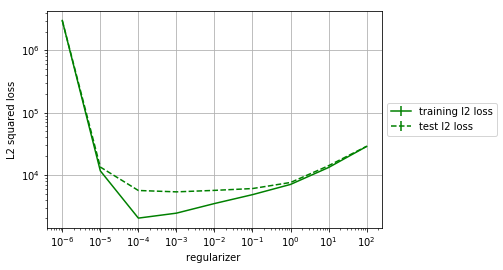

Full precision rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


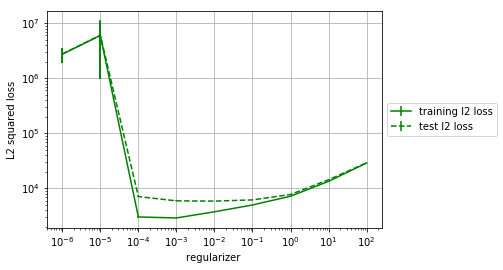

32 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


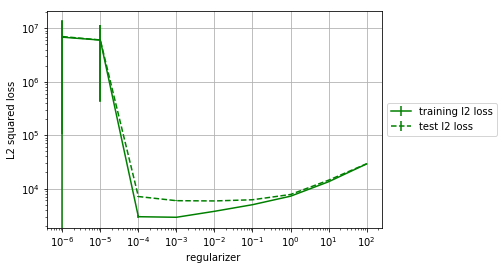

16 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


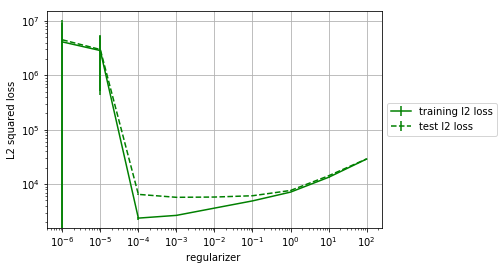

8 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


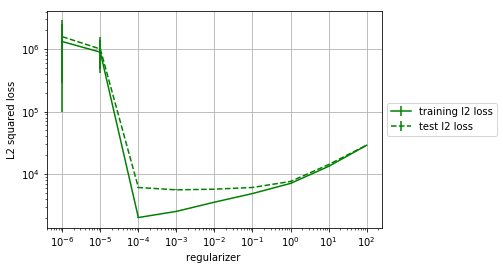

4 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


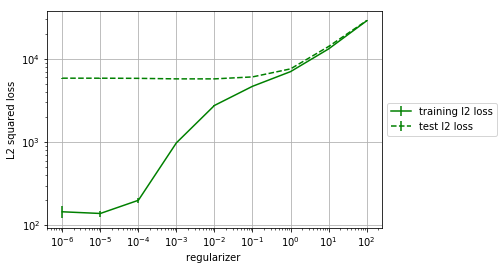

2 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
1e-06


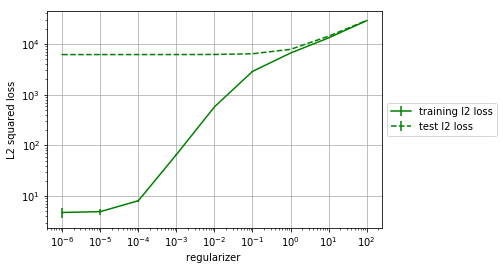

1 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.0001


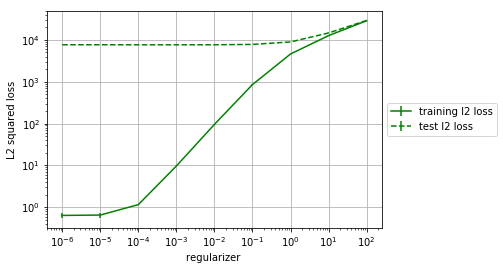

In [18]:
# plot for fixed number of features
def plot_single_precision(subkey_list_input):
    fp_bits = 32
    plt.figure()
    # n_feat_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
    lamb_list = ["1e-6", "1e-5", "1e-4", "1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2"]
    lamb_list_num = [float(x) for x in lamb_list]
    print lamb_list_num
    l2_train_mean = []
    l2_train_std = []
    l2_test_mean = []
    l2_test_std = []
    for lamb in lamb_list:
        subkey_list = subkey_list_input + ["lambda_" + lamb + "_"]
        l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, general_folder)
        l2_train_mean.append(np.mean(l2_train) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_train_std.append(np.std(l2_train) ) # = [np.min(l2_test), ] * len(n_feat_list)
        l2_test_mean.append(np.mean(l2_test) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_test_std.append(np.std(l2_test) ) # = [np.min(l2_test), ] * len(n_feat_list)
    print lamb_list_num[np.argmin(l2_test_mean) ]
    plt.errorbar(lamb_list_num, l2_train_mean, yerr=l2_train_std, fmt="g", label="training l2 loss")
    plt.errorbar(lamb_list_num, l2_test_mean, yerr=l2_test_std, fmt="g--", label="test l2 loss")
#     plt.errorbar(lamb_list_num, l2_train_mean, yerr=[x * 100 for x in l2_train_std], fmt="g", label="training l2 loss")
#     plt.errorbar(lamb_list_num, l2_test_mean, yerr=[x * 100 for x in l2_test_std] , fmt="g--", label="test l2 loss")
    ax = plt.subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel("regularizer ")
    plt.ylabel("L2 squared loss")
#     plt.ylim([None, 1e6])
    plt.show()
print("Exact kernel")
plot_single_precision(subkey_list_input=["exact", ])
print("Full precision rff kernel")
plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_4096"])
print("32 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_32_", "n_fp_feat_4096"])
print("16 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_16_", "n_fp_feat_4096"])
print("8 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_8_", "n_fp_feat_4096"])
print("4 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_4_", "n_fp_feat_4096"])
print("2 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_2_", "n_fp_feat_4096"])
print("1 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_1_", "n_fp_feat_4096"])

# 2048

Exact kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


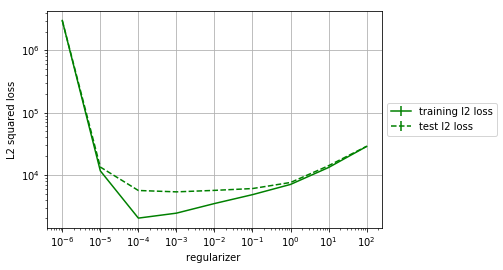

Full precision rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


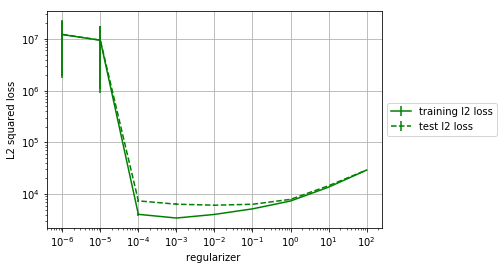

32 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


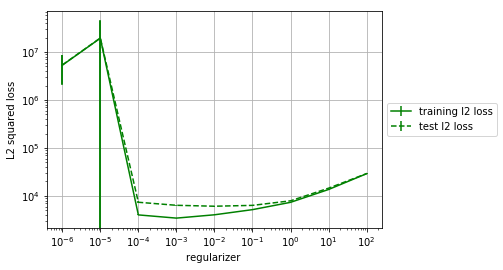

16 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


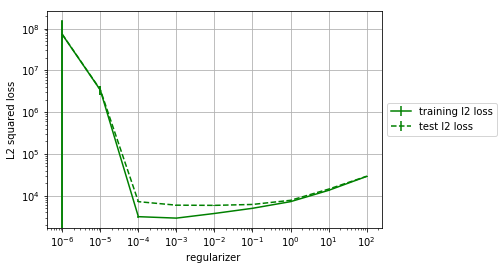

8 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


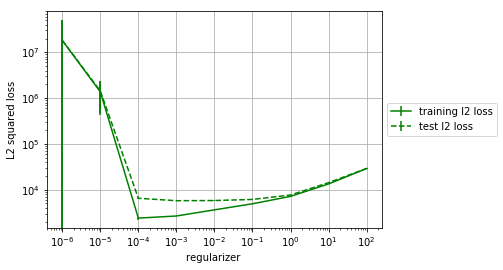

4 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


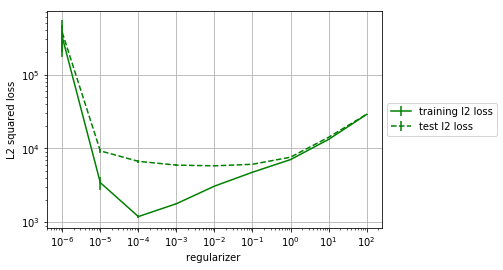

2 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.0001


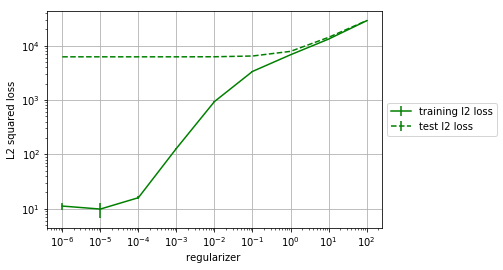

1 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
1e-06


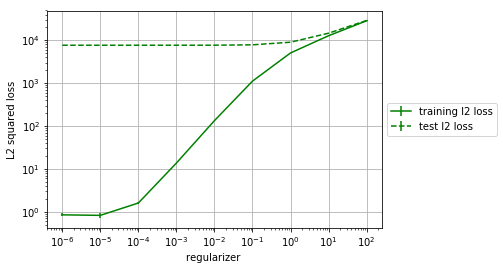

In [19]:
# plot for fixed number of features
def plot_single_precision(subkey_list_input):
    fp_bits = 32
    plt.figure()
    # n_feat_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
    lamb_list = ["1e-6", "1e-5", "1e-4", "1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2"]
    lamb_list_num = [float(x) for x in lamb_list]
    print lamb_list_num
    l2_train_mean = []
    l2_train_std = []
    l2_test_mean = []
    l2_test_std = []
    for lamb in lamb_list:
        subkey_list = subkey_list_input + ["lambda_" + lamb + "_"]
        l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, general_folder)
        l2_train_mean.append(np.mean(l2_train) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_train_std.append(np.std(l2_train) ) # = [np.min(l2_test), ] * len(n_feat_list)
        l2_test_mean.append(np.mean(l2_test) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_test_std.append(np.std(l2_test) ) # = [np.min(l2_test), ] * len(n_feat_list)
    print lamb_list_num[np.argmin(l2_test_mean) ]
    plt.errorbar(lamb_list_num, l2_train_mean, yerr=l2_train_std, fmt="g", label="training l2 loss")
    plt.errorbar(lamb_list_num, l2_test_mean, yerr=l2_test_std, fmt="g--", label="test l2 loss")
#     plt.errorbar(lamb_list_num, l2_train_mean, yerr=[x * 100 for x in l2_train_std], fmt="g", label="training l2 loss")
#     plt.errorbar(lamb_list_num, l2_test_mean, yerr=[x * 100 for x in l2_test_std] , fmt="g--", label="test l2 loss")
    ax = plt.subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel("regularizer ")
    plt.ylabel("L2 squared loss")
#     plt.ylim([None, 1e6])
    plt.show()
print("Exact kernel")
plot_single_precision(subkey_list_input=["exact", ])
print("Full precision rff kernel")
plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_2048"])
print("32 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_32_", "n_fp_feat_2048"])
print("16 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_16_", "n_fp_feat_2048"])
print("8 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_8_", "n_fp_feat_2048"])
print("4 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_4_", "n_fp_feat_2048"])
print("2 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_2_", "n_fp_feat_2048"])
print("1 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_1_", "n_fp_feat_2048"])

# 1024

Exact kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.001


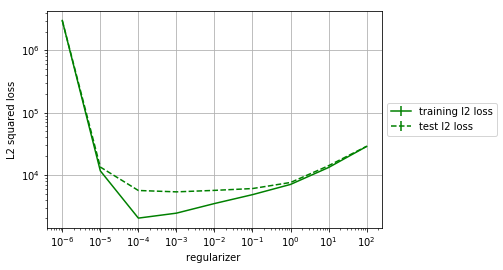

Full precision rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


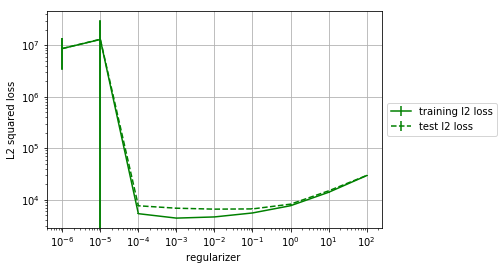

32 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


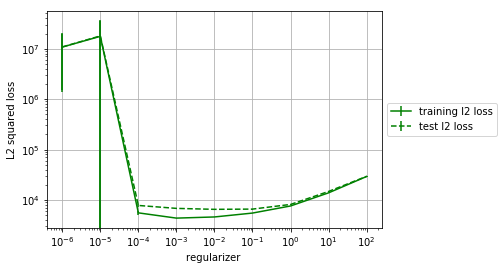

16 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


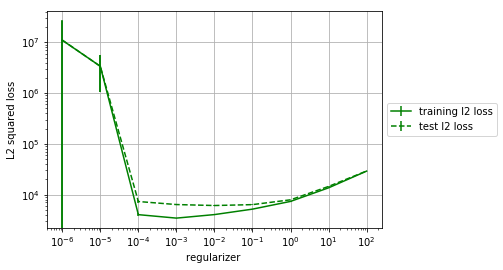

8 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


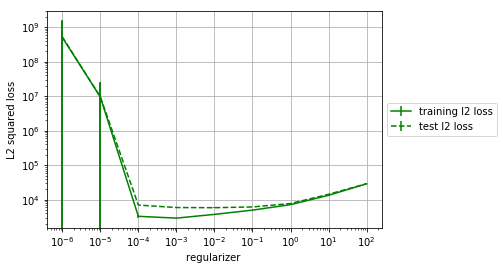

4 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


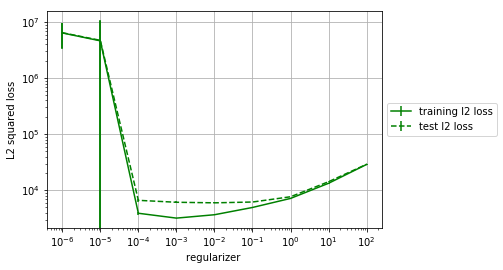

2 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
0.01


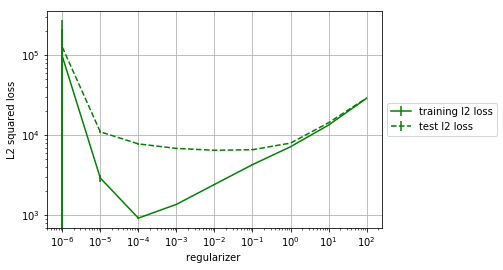

1 bit lp rff kernel
[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
1e-05


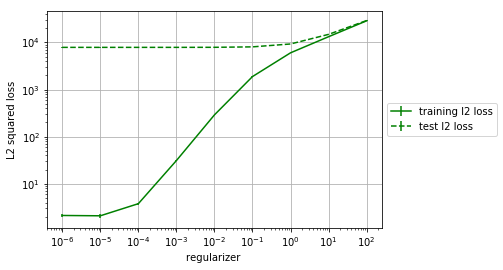

In [20]:
# plot for fixed number of features
def plot_single_precision(subkey_list_input):
    fp_bits = 32
    plt.figure()
    # n_feat_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
    lamb_list = ["1e-6", "1e-5", "1e-4", "1e-3", "1e-2", "1e-1", "1e0", "1e1", "1e2"]
    lamb_list_num = [float(x) for x in lamb_list]
    print lamb_list_num
    l2_train_mean = []
    l2_train_std = []
    l2_test_mean = []
    l2_test_std = []
    for lamb in lamb_list:
        subkey_list = subkey_list_input + ["lambda_" + lamb + "_"]
        l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, general_folder)
        l2_train_mean.append(np.mean(l2_train) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_train_std.append(np.std(l2_train) ) # = [np.min(l2_test), ] * len(n_feat_list)
        l2_test_mean.append(np.mean(l2_test) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_test_std.append(np.std(l2_test) ) # = [np.min(l2_test), ] * len(n_feat_list)
    print lamb_list_num[np.argmin(l2_test_mean) ]
    plt.errorbar(lamb_list_num, l2_train_mean, yerr=l2_train_std, fmt="g", label="training l2 loss")
    plt.errorbar(lamb_list_num, l2_test_mean, yerr=l2_test_std, fmt="g--", label="test l2 loss")
#     plt.errorbar(lamb_list_num, l2_train_mean, yerr=[x * 100 for x in l2_train_std], fmt="g", label="training l2 loss")
#     plt.errorbar(lamb_list_num, l2_test_mean, yerr=[x * 100 for x in l2_test_std] , fmt="g--", label="test l2 loss")
    ax = plt.subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel("regularizer ")
    plt.ylabel("L2 squared loss")
#     plt.ylim([None, 1e6])
    plt.show()
print("Exact kernel")
plot_single_precision(subkey_list_input=["exact", ])
print("Full precision rff kernel")
plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_1024"])
print("32 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_32_", "n_fp_feat_1024"])
print("16 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_16_", "n_fp_feat_1024"])
print("8 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_8_", "n_fp_feat_1024"])
print("4 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_4_", "n_fp_feat_1024"])
print("2 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_2_", "n_fp_feat_1024"])
print("1 bit lp rff kernel")
plot_single_precision(subkey_list_input=["lp_rff", "nbit_1_", "n_fp_feat_1024"])

# Code below are not useful

### plot exact kernel v.s. regularizer (kernel approximation error, L2 loss)

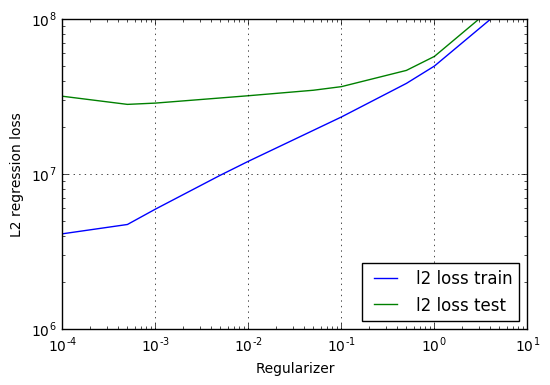

In [32]:
reg_lambda_list = []
l2_error_train_list = []
l2_error_test_list = []
tmp_dict = []
for key in dict_res.keys():
    if "exact" in key:
        tmp_dict.append((key, dict_res[key] ) )
tmp_dict = sorted(tmp_dict, key=lambda x: float(x[0].split("_lambda_")[1].split("_")[0] ))
for item in tmp_dict:
    reg_lambda = float(item[0].split("_lambda_")[1].split("_")[0] )
    reg_lambda_list.append(reg_lambda)
    l2_error_train_list.append(item[1]["train_l2_error"] )
    l2_error_test_list.append(item[1]["test_l2_error"] )        
plt.figure()
plt.loglog(reg_lambda_list, l2_error_train_list, label="l2 loss train")
plt.loglog(reg_lambda_list, l2_error_test_list, label="l2 loss test")
plt.xlabel("Regularizer")
plt.ylabel("L2 regression loss")
plt.ylim([1e6, 1e8])
plt.grid()
plt.legend(loc="lower right")
plt.show()        

### plot fp kernel v.s. exact kernel (of best regularizer)

('using n feature ', 1024)


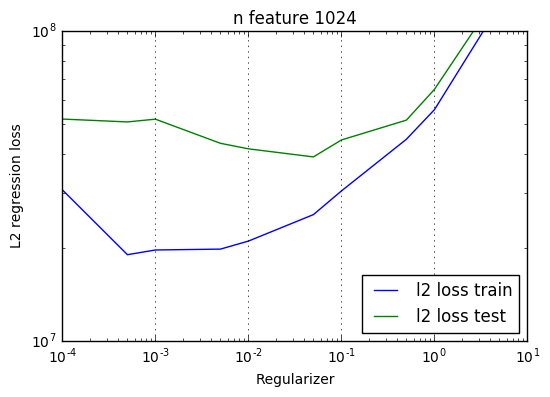

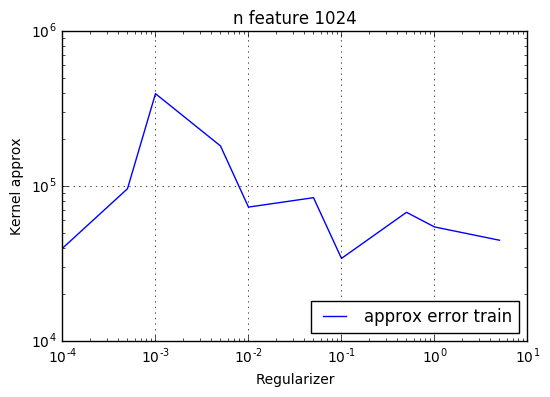

('using n feature ', 4096)


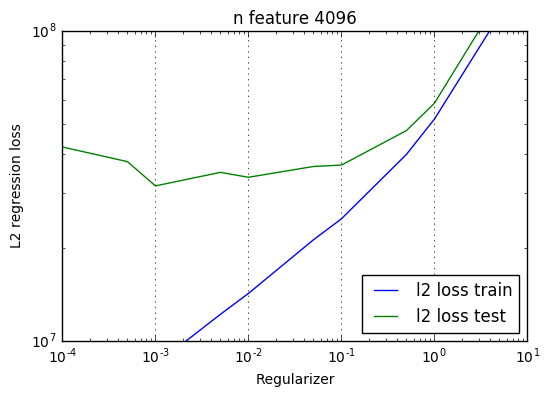

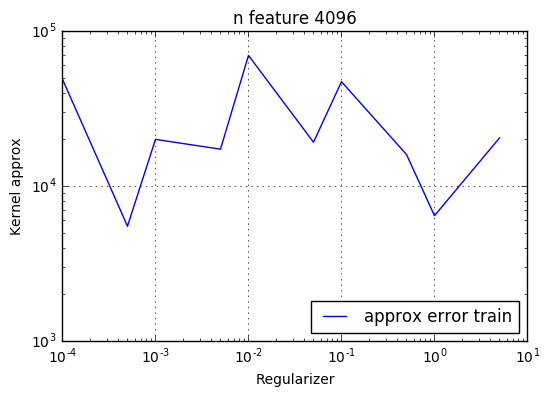

('using n feature ', 16384)


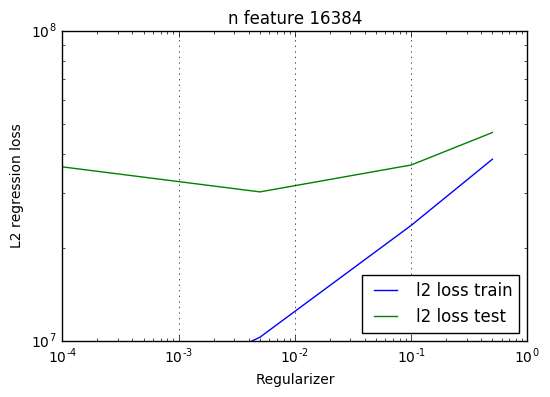

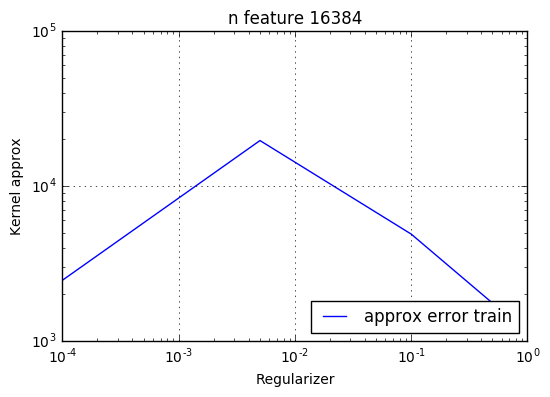

('using n feature ', 65536)
('using n feature ', 262144)
('using n feature ', 1048576)


In [48]:
def get_fp_rff_res(n_feat):
    reg_lambda_list = []
    l2_error_train_list = []
    l2_error_test_list = []
    approx_error_train_list = []
    tmp_dict = []
    for key in dict_res.keys():
        if key.startswith("fp") and "n_fp_rff_" + str(n_feat) in key:
            tmp_dict.append((key, dict_res[key] ) )
    tmp_dict = sorted(tmp_dict, key=lambda x: float(x[0].split("_lambda_")[1].split("_")[0] ))  
#     print tmp_dict
#     raw_input()
    for item in tmp_dict:
        reg_lambda = float(item[0].split("_lambda_")[1].split("_")[0] )
        reg_lambda_list.append(reg_lambda)
        l2_error_train_list.append(item[1]["train_l2_error"] )
        l2_error_test_list.append(item[1]["test_l2_error"] )
        approx_error_train_list.append(item[1]["train_approx_error"])
    return reg_lambda_list, l2_error_train_list, l2_error_test_list, approx_error_train_list

for n_feat in [1024, 4096, 16384, 65536, 262144, 1048576]:
    reg_lambda_list, l2_error_train_list, l2_error_test_list, approx_error_train_list = \
        get_fp_rff_res(n_feat)
    print("using n feature ", n_feat)
    if len(reg_lambda_list) == 0:
        continue
    plt.figure()
    plt.loglog(reg_lambda_list, l2_error_train_list, label="l2 loss train")
    plt.loglog(reg_lambda_list, l2_error_test_list, label="l2 loss test")
    plt.xlabel("Regularizer")
    plt.ylabel("L2 regression loss")
    plt.title("n feature " + str(n_feat))
    plt.ylim([1e7, 1e8])
    plt.grid()
    plt.legend(loc="lower right")
    plt.show()

    plt.figure()
    plt.loglog(reg_lambda_list, approx_error_train_list, label="approx error train")
    plt.xlabel("Regularizer")
    plt.ylabel("Kernel approx")
    plt.title("n feature " + str(n_feat))
    plt.grid()
    plt.legend(loc="lower right")
    plt.show()

### plot fp kernel v.s. lp kernel (of best regularizer)

('using n feature / n bit', 1024, 16)


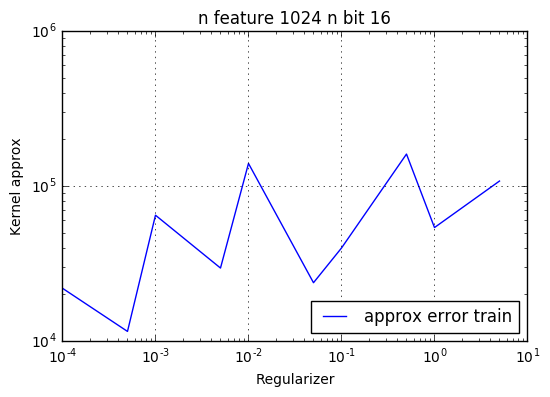

('using n feature / n bit', 4096, 16)


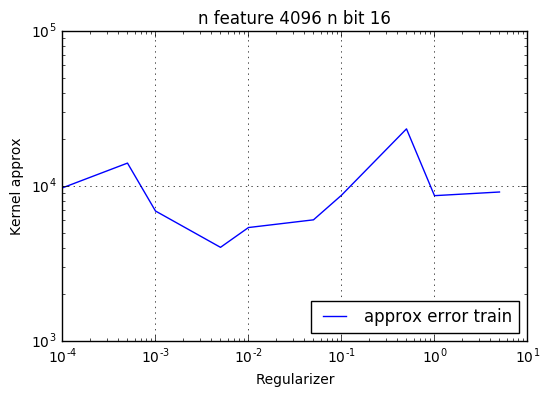

('using n feature / n bit', 16384, 16)


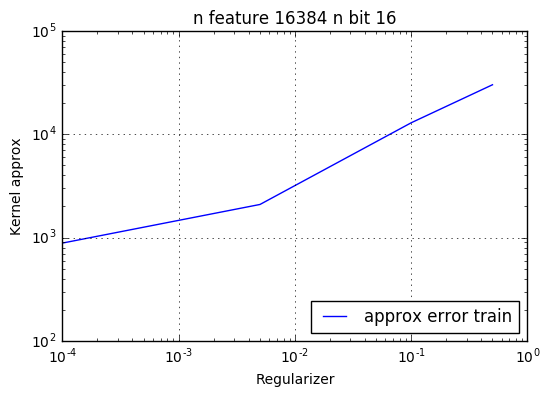

('using n feature / n bit', 65536, 16)
('using n feature / n bit', 262144, 16)
('using n feature / n bit', 1048576, 16)
('using n feature / n bit', 1024, 8)


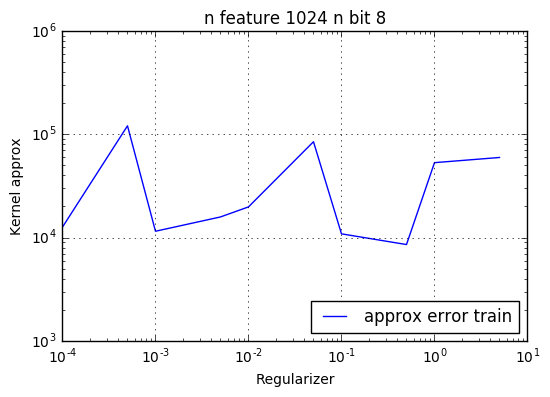

('using n feature / n bit', 4096, 8)


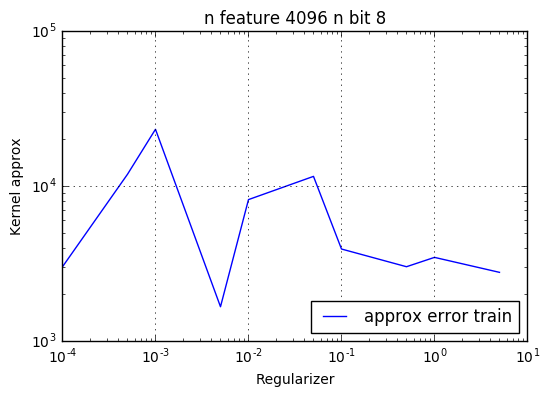

('using n feature / n bit', 16384, 8)


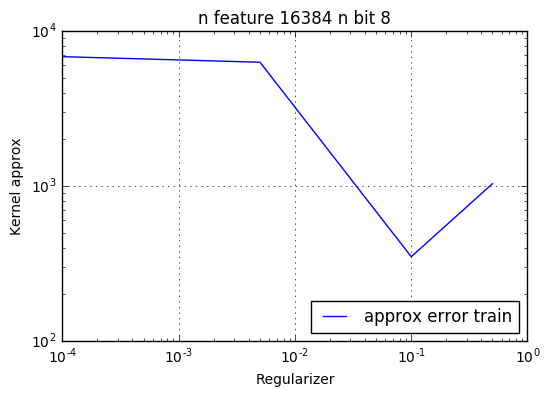

('using n feature / n bit', 65536, 8)
('using n feature / n bit', 262144, 8)
('using n feature / n bit', 1048576, 8)
('using n feature / n bit', 1024, 4)


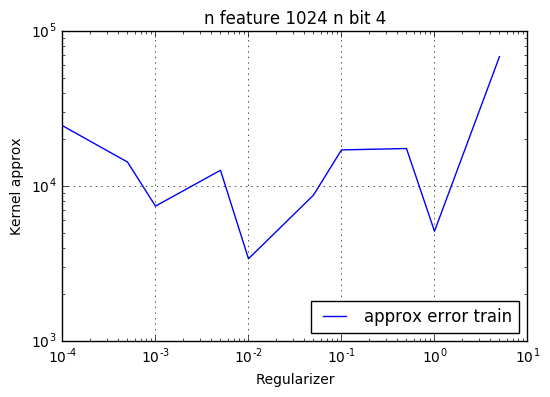

('using n feature / n bit', 4096, 4)


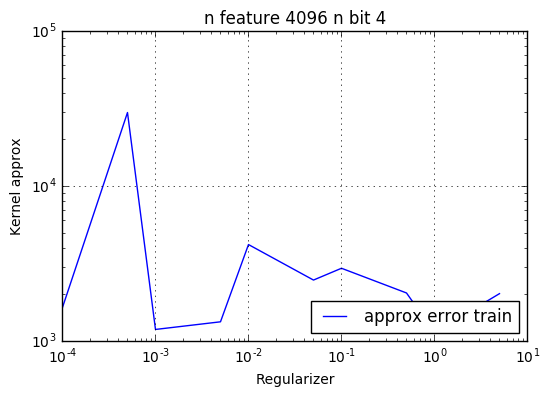

('using n feature / n bit', 16384, 4)


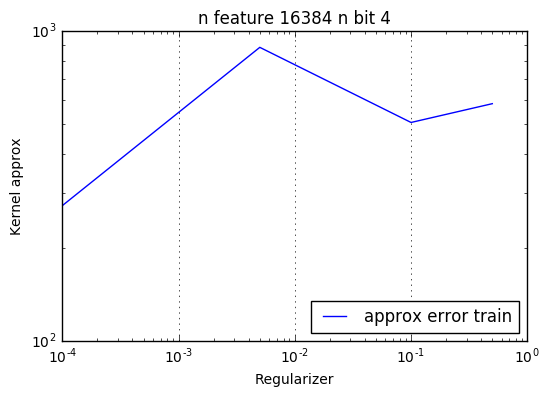

('using n feature / n bit', 65536, 4)
('using n feature / n bit', 262144, 4)
('using n feature / n bit', 1048576, 4)
('using n feature / n bit', 1024, 2)


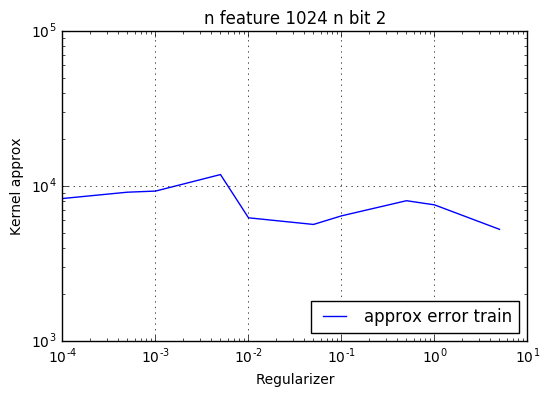

('using n feature / n bit', 4096, 2)


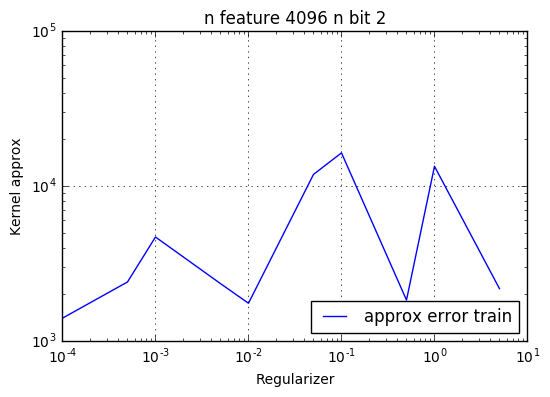

('using n feature / n bit', 16384, 2)


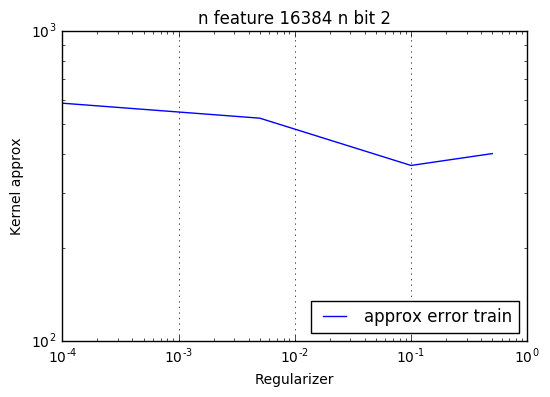

('using n feature / n bit', 65536, 2)
('using n feature / n bit', 262144, 2)
('using n feature / n bit', 1048576, 2)
('using n feature / n bit', 1024, 1)


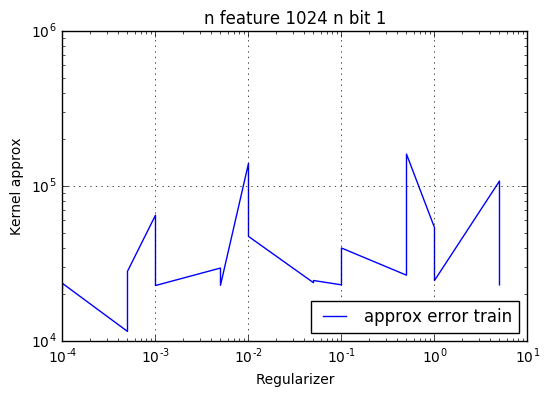

('using n feature / n bit', 4096, 1)


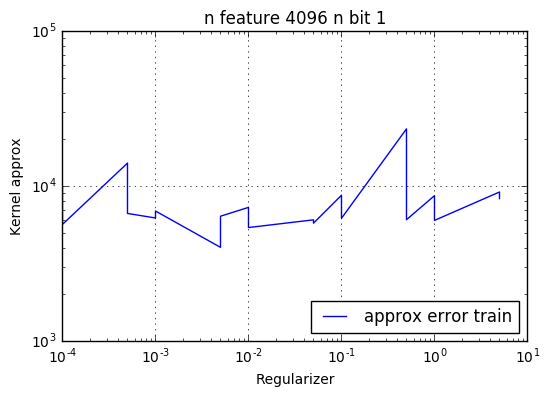

('using n feature / n bit', 16384, 1)


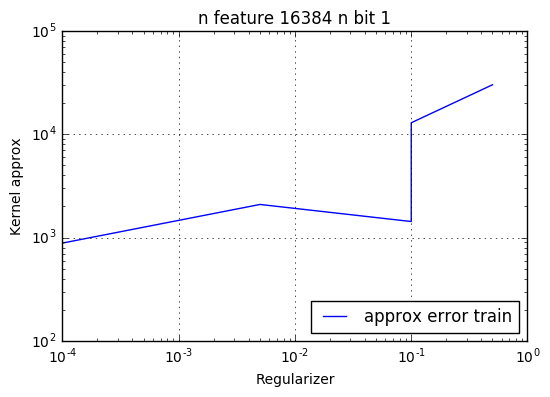

('using n feature / n bit', 65536, 1)
('using n feature / n bit', 262144, 1)
('using n feature / n bit', 1048576, 1)


In [49]:
def get_lp_rff_res(n_feat, n_bit):
    reg_lambda_list = []
    l2_error_train_list = []
    l2_error_test_list = []
    approx_error_train_list = []
    tmp_dict = []
    for key in dict_res.keys():
        if key.startswith("lp") and "n_fp_rff_" + str(n_feat) in key and "nbit_" + str(n_bit) in key:
            tmp_dict.append((key, dict_res[key] ) )
    tmp_dict = sorted(tmp_dict, key=lambda x: float(x[0].split("_lambda_")[1].split("_")[0] ))  
#     print tmp_dict
#     raw_input()
    for item in tmp_dict:
        reg_lambda = float(item[0].split("_lambda_")[1].split("_")[0] )
        reg_lambda_list.append(reg_lambda)
        l2_error_train_list.append(item[1]["train_l2_error"] )
        l2_error_test_list.append(item[1]["test_l2_error"] )
        approx_error_train_list.append(item[1]["train_approx_error"])
    return reg_lambda_list, l2_error_train_list, l2_error_test_list, approx_error_train_list

for n_bit in [16, 8, 4, 2, 1]:
    for n_feat in [1024, 4096, 16384, 65536, 262144, 1048576]:
        reg_lambda_list, l2_error_train_list, l2_error_test_list, approx_error_train_list = \
            get_lp_rff_res(n_feat, n_bit)
        print("using n feature / n bit", n_feat, n_bit)
        if len(reg_lambda_list) == 0:
            continue
#         plt.figure()
#         plt.loglog(reg_lambda_list, l2_error_train_list, label="l2 loss train")
#         plt.loglog(reg_lambda_list, l2_error_test_list, label="l2 loss test")
#         plt.xlabel("Regularizer")
#         plt.ylabel("L2 regression loss")
#         plt.title("n feature " + str(n_feat) + " n bit " + str(n_bit) )
#         plt.ylim([1e6, 1e8])
#         plt.grid()
#         plt.legend(loc="lower right")
#         plt.show()

#         plt.figure()
#         plt.loglog(reg_lambda_list, approx_error_train_list, label="approx error train")
#         plt.xlabel("Regularizer")
#         plt.ylabel("Kernel approx")
#         plt.title("n feature " + str(n_feat) + " n bit " + str(n_bit) )
#         plt.grid()
#         plt.legend(loc="lower right")
#         plt.show()

### plot fp kernel (of best regularizer) v.s. exact kernel (of best regularizer)